In [1]:
import pandas as pd

movies = pd.read_csv('data/movies.csv')
movies = movies.set_index('movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# First recommendation attempt: total ratings heuristic

In [3]:
total_ratings = ratings['movieId'].value_counts()
total_ratings.head()

356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [4]:
movies['total_ratings'] = total_ratings
movies.head()

,title,genres,total_ratings
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [5]:
movies.loc[318]

title            Shawshank Redemption, The (1994)
genres                                Crime|Drama
total_ratings                               317.0
Name: 318, dtype: object

In [6]:
movies.sort_values('total_ratings', ascending = False)

,title,genres,total_ratings
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
32160,Twentieth Century (1934),Comedy,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN


In [7]:
ratings_means = ratings.groupby('movieId').mean()['rating']
ratings_means.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [8]:
movies['ratings_mean'] = ratings_means

# Second heuristic: ratings mean and filtering ratings

In [9]:
movies.sort_values('ratings_mean', ascending = False).head(10)

,title,genres,total_ratings,ratings_mean
movieId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [10]:
movies.query('total_ratings >= 10').sort_values('ratings_mean', ascending = False).head(10)

,title,genres,total_ratings,ratings_mean
movieId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [11]:
movies_with_more_than_50_ratings = movies.query('total_ratings >= 50')
movies_with_more_than_50_ratings.sort_values('ratings_mean', ascending = False).head(10)

,title,genres,total_ratings,ratings_mean
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Creating a fake user access

In [12]:
movies_that_i_watched = [1, 2, 7, 10, 11, 19, 21]
movies.loc[movies_that_i_watched]

,title,genres,total_ratings,ratings_mean
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382


In [13]:
movies_of_adventure_children_fantasy = movies_with_more_than_50_ratings.query('genres == "Adventure|Children|Fantasy"')
movies_of_adventure_children_fantasy.sort_values('ratings_mean', ascending = False).head(10)

,title,genres,total_ratings,ratings_mean
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [14]:
movies_of_adventure_children_fantasy.drop(movies_that_i_watched, errors = 'ignore').sort_values('ratings_mean', ascending = False).head(10)

,title,genres,total_ratings,ratings_mean
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Collaborative filtering x Content based filtering

## Search for users similar

- John rated toy story with 4
- Mary rated toy story with 5
- Paul rated toy story with 3
- Joan rated toy story with 3.5

x - y => distance

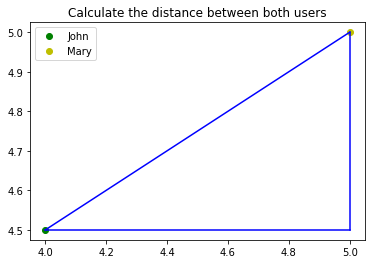

In [15]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['John', 'Mary'])
plt.title('Calculate the distance between both users')

plt.plot([4, 5], [4.5, 4.5], linestyle = '-', color = 'b')
plt.plot([4, 5], [4.5, 5], linestyle = '-', color = 'b')
plt.plot([5, 5], [4.5, 5], linestyle = '-', color = 'b')

In [16]:
import numpy as np

john = np.array([4, 4.5])
mary = np.array([5, 5])

john - mary

array([-1. , -0.5])

In [17]:
from math import sqrt
def vector_distance(a, b):
    (x, y) = a - b
    return sqrt(x**2 + y**2)

In [18]:
vector_distance(john, mary)

1.118033988749895

# Distance between users from dataset

In [19]:
def vector_distance(a, b):
    return np.linalg.norm(a - b)

In [20]:
vector_distance(john, mary)

1.118033988749895

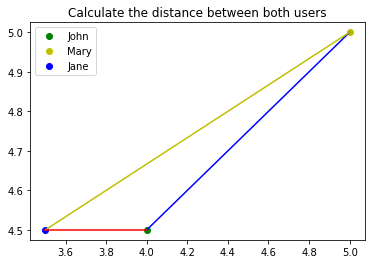

In [21]:
import matplotlib.pyplot as plt

jane = np.array([3.5, 4.5])

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['John', 'Mary', 'Jane'])
plt.title('Calculate the distance between both users')

plt.plot([4, 5], [4.5, 5], linestyle = '-', color = 'b')

plt.plot([3.5, 5], [4.5, 5], linestyle = '-', color = 'y')

plt.plot([3.5, 4], [4.5, 4.5], linestyle = '-', color = 'r')

In [22]:
print(vector_distance(john, mary))

1.118033988749895


In [23]:
print(vector_distance(john, jane))

0.5


In [24]:
def user_ratings(user_id):
    u_ratings = ratings.query(f'userId == {user_id}')
    u_ratings = u_ratings[['movieId', 'rating']].set_index('movieId')
    return u_ratings

In [25]:
user1 = user_ratings(1)
user4 = user_ratings(4)

In [26]:
differences = user1.join(user4, lsuffix = '_left', rsuffix = '_right')
differences

,rating_left,rating_right
movieId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


In [27]:
differences = differences.dropna()
differences

,rating_left,rating_right
movieId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [28]:
vector_distance(differences['rating_left'], differences['rating_right'])

11.135528725660043

In [29]:
def user_distance(user_id1, user_id2):
    ratings1 = user_ratings(user_id1)
    ratings2 = user_ratings(user_id2)
    differences = ratings1.join(ratings2, lsuffix = '_left', rsuffix = '_right').dropna()
    distance = vector_distance(differences['rating_left'], differences['rating_right'])
    return [user_id1, user_id2, distance]

In [30]:
user_distance(1, 4)

[1, 4, 11.135528725660043]

In [31]:
total_users = len(ratings['userId'].unique())
print(f'We have {total_users} in our dataset')

We have 610 in our dataset


In [39]:
# imperative function
def distance_from_all(user_id):
    distances = []
    for user in ratings['userId'].unique():
        data = user_distance(user, user_id)
        distances.append(data)
    return distances

In [58]:
# declarative function
def distance_from_all(user_id):
  all_users = ratings['userId'].unique()
  distances = [user_distance(user_id, user) for user in all_users]
  distances = pd.DataFrame(distances, columns = ["user_1", "user_2", "distance"])
  return distances

In [59]:
user_test_id = 1
distance_from_all(user_test_id)[:5]

,user_1,user_2,distance
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [60]:
user_ratings(1).join(user_ratings(500), lsuffix = '_1', rsuffix = '_5').dropna()

,rating_1,rating_5
movieId,,
1,4.0,4.0
101,5.0,1.0
216,5.0,4.0
231,5.0,1.0
260,5.0,4.0
356,4.0,4.0
480,4.0,4.0
543,4.0,4.0
1029,5.0,3.0


# Users with nothing in common are placed as distant from the other

In [61]:
def user_distance(user_id1, user_id2, minimal = 5):
    ratings1 = user_ratings(user_id1)
    ratings2 = user_ratings(user_id2)
    differences = ratings1.join(ratings2, lsuffix = '_left', rsuffix = '_right').dropna()

    if(len(differences) < minimal):
        return [user_id1, user_id2, 100000]

    distance = vector_distance(differences['rating_left'], differences['rating_right'])
    return [user_id1, user_id2, distance]

In [62]:
def nearest_neighbors(user_id):
    distances = distance_from_all(user_id)
    distances = distances.sort_values('distance')
    distances = distances.set_index('user_2').drop(user_id)
    return distances

In [63]:
nearest_neighbors(1).head()

,user_1,distance
user_2,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


# Tests parameter

In [64]:
def nearest_neighbors(user_id, keys_to_be_analysed = None):
    distances = distance_from_all(user_id, keys_to_be_analysed = keys_to_be_analysed)
    distances = distances.sort_values('distance')
    distances = distances.set_index('user_2').drop(user_id)
    return distances

In [65]:
def distance_from_all(user_id, keys_to_be_analysed = None):
    total_users = ratings['userId'].unique()
    if keys_to_be_analysed:
        total_users = total_users[:keys_to_be_analysed]
    distances = [user_distance(user, user_id) for user in total_users]
    distances = pd.DataFrame(distances, columns = ['user_1', 'user_2', 'distance'])
    return distances

In [66]:
nearest_neighbors(1, keys_to_be_analysed = 50)

,user_1,distance
user_2,,


In [68]:
def user_distance(user_id1, user_id2, minimal = 5):
    ratings1 = user_ratings(user_id1)
    ratings2 = user_ratings(user_id2)
    differences = ratings1.join(ratings2, lsuffix = '_left', rsuffix = '_right').dropna()

    if(len(differences) < minimal):
        return None

    distance = vector_distance(differences['rating_left'], differences['rating_right'])
    return [user_id1, user_id2, distance]

In [69]:
def distance_from_all(user_id, keys_to_be_analysed = None):
    total_users = ratings['userId'].unique()
    if keys_to_be_analysed:
        total_users = total_users[:keys_to_be_analysed]
    distances = [user_distance(user_test_id, user_id) for user_id in total_users]
    distances = list(filter(None, distances))
    distances = pd.DataFrame(distances, columns = ['user_1', 'user_2', 'distance'])
    return distances

In [70]:
nearest_neighbors(1, keys_to_be_analysed = 50)

,user_1,distance
user_2,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [71]:
user_test_id = 1
user_test_ratings = user_ratings(user_test_id)
user_test_watched_movies = user_test_ratings.index

nearests = nearest_neighbors(user_test_id, keys_to_be_analysed = 50)
nearest = nearests.iloc[0].name

nearest_ratings = user_ratings(nearest)
nearest_ratings = nearest_ratings.drop(user_test_watched_movies, errors = 'ignore')
nearest_ratings.sort_values('rating', ascending = False).head()

,rating
movieId,
1200,4.5
4022,4.5
47099,4.5
79132,4.5
109487,4.5


# Remmendation by the nearest user

In [72]:
def recommends(user_id, keys_to_be_analysed = None):
    user_watched_movies = user_ratings(user_id).index

    nearests = nearest_neighbors(user_id, keys_to_be_analysed = keys_to_be_analysed)
    nearest = nearests.iloc[0].name

    nearest_ratings = user_ratings(nearest)
    nearest_ratings = nearest_ratings.drop(user_watched_movies, errors = 'ignore')
    recommendations = nearest_ratings.sort_values('rating', ascending = False).head()
    return recommendations.join(movies)

In [73]:
recommends(1).head()

,rating,title,genres,total_ratings,ratings_mean
movieId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# Remmendation by multiple users

In [74]:
def knn(user_id, k_nearest_neighbors = 10, keys_to_be_analysed = None):
    distances = distance_from_all(user_id, keys_to_be_analysed = keys_to_be_analysed)
    distances = distances.sort_values('distance')
    distances = distances.set_index('user_2').drop(user_id, errors = 'ignore')
    return distances.head(k_nearest_neighbors)

In [75]:
def recommends(user_id, k_nearest_neighbors = 10, keys_to_be_analysed = None):
    user_watched_movies = user_ratings(user_id).index

    nearests = knn(user_id, k_nearest_neighbors = k_nearest_neighbors, keys_to_be_analysed = keys_to_be_analysed)
    nearests_users = nearests.index
    nearests_ratings = ratings.set_index('userId').loc[nearests_users]
    nearests_ratings = nearest_ratings.drop(user_watched_movies, errors = 'ignore')
    recommendations = nearests_ratings.groupby('movieId').mean()[['rating']]
    recommendations = recommendations.sort_values('rating', ascending = False).head()
    return recommendations.join(movies)

In [76]:
recommends(1).head()

,rating,title,genres,total_ratings,ratings_mean
movieId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [77]:
new_user_data = [[122904, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [1, 2], [7, 0.5], [2, 2], [1196, 1], [260, 1]]
new_user_data

[[122904, 2],
 [1246, 5],
 [2529, 2],
 [2329, 5],
 [2324, 5],
 [1, 2],
 [7, 0.5],
 [2, 2],
 [1196, 1],
 [260, 1]]

In [78]:
def new_user(data):
    new_user_id = ratings['userId'].max() + 1
    new_user_ratings = pd.DataFrame(data, columns = ['movieId', 'rating'])
    new_user_ratings['userId'] = new_user_id
    return pd.concat([ratings, new_user_ratings])

In [79]:
ratings = new_user(new_user_data)
ratings.tail()

,userId,movieId,rating,timestamp
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [80]:
last_user_id = ratings['userId'].max()
recommends(last_user_id)

,rating,title,genres,total_ratings,ratings_mean
movieId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


# Use only movie ratings with more than 50 votes

In [81]:
movies_with_more_than_50_ratings.head()

,title,genres,total_ratings,ratings_mean
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185


In [82]:
ratings = ratings.set_index('movieId').loc[movies_with_more_than_50_ratings.index]
ratings.head()

,userId,rating,timestamp
movieId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [83]:
ratings = ratings.reset_index()
ratings.head()

,movieId,userId,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [84]:
recommends(last_user_id)

,rating,title,genres,total_ratings,ratings_mean
movieId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [85]:
def knn(user_id, k_nearest_neighbors = 10, keys_to_be_analysed = None):
    distances = distance_from_all(user_id, keys_to_be_analysed = keys_to_be_analysed)
    distances = distances.sort_values('distance')
    distances = distances.set_index('user_2').drop(user_id, errors = 'ignore')
    return distances.head(k_nearest_neighbors)

In [86]:
def recommends(user_id, k_nearest_neighbors = 10, keys_to_be_analysed = None):
    user_watched_movies = user_ratings(user_id).index

    nearests = knn(user_id, k_nearest_neighbors = k_nearest_neighbors, keys_to_be_analysed = keys_to_be_analysed)
    nearests_users = nearests.index
    nearests_ratings = ratings.set_index('userId').loc[nearests_users]

    recommendations = nearests_ratings.groupby('movieId').mean()[['rating']]
    ratings_count = nearests_ratings.groupby('movieId').count()[['rating']]

    minimal_filtered_ratings = k_nearest_neighbors / 2
    recommendations = recommendations.join(ratings_count, lsuffix = '_nearest_users_mean', rsuffix = '_count')
    recommendations = recommendations.query(f'rating_count >= {minimal_filtered_ratings:.2f}')
    recommendations = recommendations.sort_values('rating_nearest_users_mean', ascending = False)
    recommendations = recommendations.drop(user_watched_movies, errors = 'ignore')

    return recommendations.join(movies)

In [87]:
recommends(last_user_id, k_nearest_neighbors = 10, keys_to_be_analysed = 5600)

,rating_nearest_users_mean,rating_count,title,genres,total_ratings,ratings_mean
movieId,,,,,,
2571,4.916667,6,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
7153,4.700000,5,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.700000,5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.666667,6,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
2959,4.642857,7,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
527,4.571429,7,Schindler's List (1993),Drama|War,220.0,4.225000
79132,4.250000,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


In [88]:
recommends(last_user_id, k_nearest_neighbors = 20)

,rating_nearest_users_mean,rating_count,title,genres,total_ratings,ratings_mean
movieId,,,,,,
527,4.750000,12,Schindler's List (1993),Drama|War,220.0,4.225000
2959,4.650000,10,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
2571,4.625000,12,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
318,4.590909,11,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
356,4.450000,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
79132,4.400000,10,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
